<a href="https://colab.research.google.com/github/abhishek27vijayan/abhishek27vijayan/blob/main/intern_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
s=1
time=np.linspace(0,s,1000,endpoint=True)
time


In [ ]:
nfrequency=200
namplitude=1
noise=namplitude*np.sin(2*np.pi*nfrequency*time)

In [ ]:
amplitude=15
frequency=10
phase=5
signal=amplitude*np.sin(2*np.pi*frequency*time+ phase)
signal1=signal+noise
signal1


In [ ]:
fig1=go.Figure(layout=dict(xaxis=dict(title="time"),yaxis=dict(title="amplitude")))
fig1.add_scatter(x=time,y=signal1)
fig1.update_layout(title='SIGNAL')
fig1.show()

In [ ]:
plt.figure(figsize=(21,7))
plt.scatter(time,signal1,s=10,c='g',label="SIGNAL")
plt.title("GRAPH")
plt.xlabel("TIME")
plt.ylabel("AMPLITUDE")
plt.legend()
plt.show()

In [ ]:
trainx, testx = time[0:int(0.8*(len(time)))], time[int(0.8*(len(time))):]
trainy, testy = signal1[0:int(0.8*(len(signal1)))], signal1[int(0.8*(len(signal1))):]
train = np.array(list(zip(trainx,trainy)))
test = np.array(list(zip(trainx,trainy)))

In [ ]:
def create_dataset(n_X, look_back):
   dataX, dataY = [], []
   for i in range(len(n_X)-look_back):
      a = n_X[i:(i+look_back), ]
      dataX.append(a)
      dataY.append(n_X[i + look_back, ])
   return np.array(dataX), np.array(dataY)

In [15]:
look_back = 1
trainx,trainy = create_dataset(train, look_back)
testx,testy = create_dataset(test, look_back)
trainx = np.reshape(trainx, (trainx.shape[0], 1, 2))
testx = np.reshape(testx, (testx.shape[0], 1, 2))

In [17]:
model = Sequential()
model.add(LSTM(512, return_sequences = True, input_shape = (trainx.shape[1], 2)))
model.add(LSTM(256,input_shape = (trainx.shape[1], 2)))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
model.fit(trainx, trainy, epochs = 100, batch_size = 10, verbose = 2, shuffle = False)
model.save_weights('LSTMBasic2.h5')

Epoch 1/100
80/80 - 5s - loss: 15.8890 - accuracy: 0.9662
Epoch 2/100
80/80 - 1s - loss: 1.0910 - accuracy: 0.9675
Epoch 3/100
80/80 - 1s - loss: 0.6523 - accuracy: 0.9675
Epoch 4/100
80/80 - 1s - loss: 0.6303 - accuracy: 0.9675
Epoch 5/100
80/80 - 1s - loss: 0.6302 - accuracy: 0.9675
Epoch 6/100
80/80 - 1s - loss: 0.6308 - accuracy: 0.9687
Epoch 7/100
80/80 - 1s - loss: 0.6316 - accuracy: 0.9712
Epoch 8/100
80/80 - 1s - loss: 0.6324 - accuracy: 0.9712
Epoch 9/100
80/80 - 1s - loss: 0.6334 - accuracy: 0.9687
Epoch 10/100
80/80 - 1s - loss: 0.6344 - accuracy: 0.9687
Epoch 11/100
80/80 - 1s - loss: 0.6359 - accuracy: 0.9700
Epoch 12/100
80/80 - 1s - loss: 0.6415 - accuracy: 0.9700
Epoch 13/100
80/80 - 1s - loss: 0.6797 - accuracy: 0.9700
Epoch 14/100
80/80 - 1s - loss: 0.7913 - accuracy: 0.9725
Epoch 15/100
80/80 - 1s - loss: 0.7057 - accuracy: 0.9725
Epoch 16/100
80/80 - 1s - loss: 0.6486 - accuracy: 0.9725
Epoch 17/100
80/80 - 1s - loss: 0.6453 - accuracy: 0.9725
Epoch 18/100
80/80 - 1

In [13]:
model.load_weights('LSTMBasic2.h5')
predict = model.predict(testx)

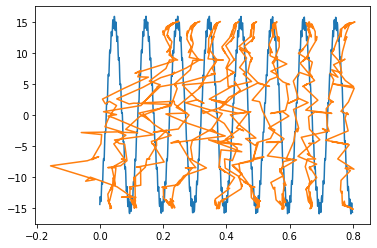

In [16]:
plt.plot(testx.reshape(799,2)[:,0:1], testx.reshape(799,2)[:,1:2])
plt.plot(predict[:,0:1], predict[:,1:2])